In [1]:
%load_ext autoreload 
%autoreload 2
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.nn import functional as F
plt.style.use("seaborn-v0_8")

## Movie Lens dataset

In [2]:
rating_df = pd.read_csv("/mnt/dl/machine_learning_dataset/movieLens1m/ratings.dat", sep='::', header=None, names=['userId', 'movieId', 'rating', 'timestamp'],engine='python' )
rating_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
movies_df = pd.read_table("/mnt/dl/machine_learning_dataset/movieLens1m/movies.dat", sep='::', header=None, names= ['movieId', 'title', 'genres'], engine='python',
                          encoding_errors="ignore")
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [46]:
movie_names = dict(zip(movies_df.movieId, movies_df.title))
genres = dict(zip(movies_df.title, movies_df.genres))

In [5]:
rating_df["movieTitle"] = rating_df["movieId"].apply(lambda x: movie_names[x])

In [6]:
rating_df

,userId,movieId,rating,timestamp,movieTitle
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,978302109,James and the Giant Peach (1996)
2,1,914,3,978301968,My Fair Lady (1964)
3,1,3408,4,978300275,Erin Brockovich (2000)
4,1,2355,5,978824291,"Bug's Life, A (1998)"
...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989)
1000205,6040,1094,5,956704887,"Crying Game, The (1992)"
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995)
1000207,6040,1096,4,956715648,Sophie's Choice (1982)


In [7]:
df = rating_df.pivot(index=["userId"], columns=["movieTitle"], values="rating")

In [8]:
df

movieTitle,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjrlighetens kjtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,3.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6040
Columns: 3706 entries, $1,000,000 Duck (1971) to eXistenZ (1999)
dtypes: float64(3706)
memory usage: 170.8 MB


In [10]:
df.iloc[1].dropna()

movieTitle
Alien: Resurrection (1997)    3.0
Amadeus (1984)                5.0
American Beauty (1999)        4.0
Armageddon (1998)             3.0
As Good As It Gets (1997)     5.0
                             ... 
Untouchables, The (1987)      4.0
Verdict, The (1982)           4.0
Waking Ned Devine (1998)      3.0
What About Bob? (1991)        3.0
Yojimbo (1961)                4.0
Name: 2, Length: 129, dtype: float64

In [11]:
M, N = len(df), len(df.columns)
M, N

(6040, 3706)

In [12]:
mask = (~df.isna())#.astype(int)
mask

movieTitle,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjrlighetens kjtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,False,True,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,True
6037,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Matrix Factorization model

In [40]:
class MF(nn.Module):
    
    def __init__(self, nuser, nitem, k):
        super().__init__()
        self.U = nn.Parameter(torch.randn(nuser, k))
        self.V = nn.Parameter(torch.randn(nitem, k))
        self.bu = nn.Parameter(torch.randn(nuser, 1))
        self.bi = nn.Parameter(torch.randn(1, nitem))
        self.b = nn.Parameter(torch.randn(1))
    
    def forward(self):
        out = self.U @ self.V.t() + self.bu + self.bi + self.b
        return out
        return F.relu(out)

In [41]:
torch.manual_seed(0)
mf_model = MF(M, N, 50).cuda()
losses = []
eps = 20000
xlabel = torch.from_numpy(df.to_numpy()).cuda()
mask_label = torch.from_numpy(mask.to_numpy()).cuda()

def mf_criterion(x, xhat, mask, model: MF, alpha=1e-2):
    loss =  (x[mask] - xhat[mask]).square().mean()
    param_loss = model.U.norm() + model.V.norm() + model.bu.norm() + model.bi.norm()
    
    loss += alpha * param_loss
    return loss
    
optim = torch.optim.Adam(mf_model.parameters(), lr=1e-3)
for i in range(eps):
    xhat = mf_model()
    loss = mf_criterion(xlabel, xhat, mask_label, mf_model)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.item())

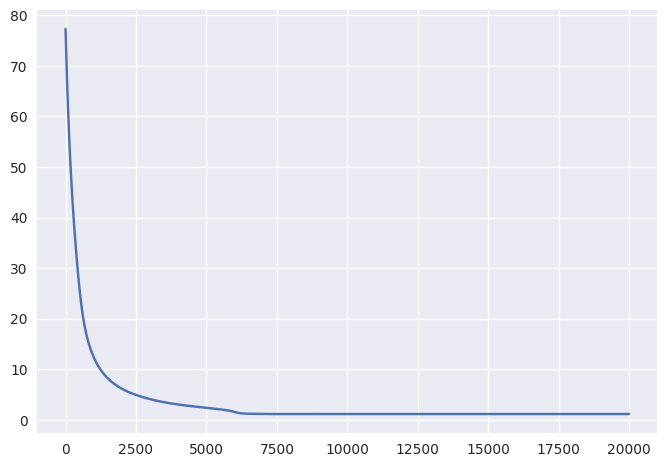

In [42]:
plt.plot(losses)

In [43]:
mf_model().ceil()[mask_label]

tensor([4., 4., 4.,  ..., 4., 4., 5.], device='cuda:0',
       grad_fn=<IndexBackward0>)

In [44]:
xlabel[mask_label]

tensor([4., 4., 4.,  ..., 4., 5., 4.], device='cuda:0', dtype=torch.float64)

In [45]:
(mf_model().ceil()[mask_label] == xlabel[mask_label]).sum() / mask_label.sum()

tensor(0.3814, device='cuda:0')

## Autorec Model

In [170]:
class AutoRec(nn.Module):
    
    def __init__(self, m, k):
        super().__init__()
        self.V = nn.Parameter(torch.Tensor(m, k))
        self.W = nn.Parameter(torch.Tensor(m, k))
        self.bv = nn.Parameter(torch.Tensor(1, k))
        self.bw = nn.Parameter(torch.Tensor(1, m))
        
        with torch.no_grad():
            nn.init.xavier_uniform_(self.V)
            nn.init.xavier_uniform_(self.W)
            nn.init.constant_(self.bw, 0.)
            nn.init.constant_(self.bv, 0.)
        
    def forward(self, x):
        # x: (M, N)
        x = x.t() @ self.V + self.bv
        x = F.sigmoid(x)
        x = F.dropout(x, 0.1)
        x = x @ self.W.t() + self.bw 
        
        return x.t()
        

In [171]:
torch.manual_seed(0)
autorec = AutoRec(M, 50).cuda().train()
losses = []
# # eps = 20000
eps = 8000
xlabel = torch.from_numpy(df.to_numpy()).float().cuda()
invald_mask = torch.from_numpy(~mask.to_numpy()).bool().cuda()
xlabel[invald_mask] = 0.0
valid_mask = torch.logical_not(invald_mask)
optim = torch.optim.Adam(autorec.parameters(), lr=1e-3)
alpha = 0.1
for i in range(eps):
    xhat = autorec(xlabel)
    loss =  ((valid_mask.int() * (xlabel - xhat).square()).sum() / valid_mask.sum() + 
             alpha * (autorec.W.norm() + autorec.V.norm()))

    optim.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(autorec.parameters(), 10)
    optim.step()
    losses.append(loss.item())

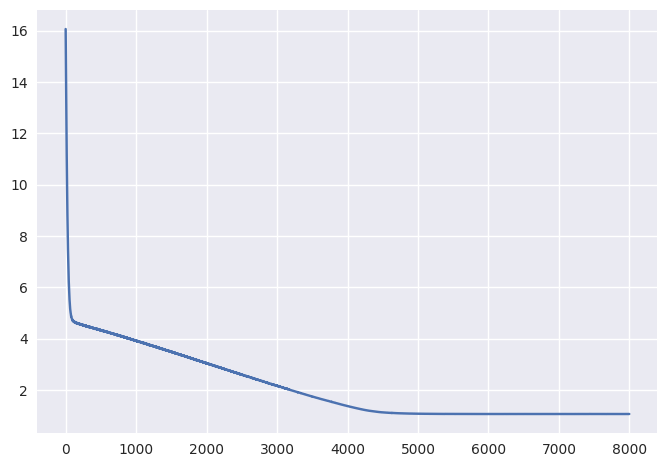

In [172]:
plt.plot(losses)

In [173]:
with torch.no_grad():
    autorec.eval()
    xhat = autorec(xlabel)
    print((xhat.ceil()[valid_mask] == xlabel[valid_mask]).sum() / valid_mask.sum())


tensor(0.3703, device='cuda:0')
